In [1]:
#!pip install -U google-generativeai
#!pip install openai==0.28

import google.generativeai as genai
import openai
import requests
import os
from io import BytesIO
from PIL import Image

In [2]:
# https://aistudio.google.com/app/apikey Get an api key
genai.configure(api_key="") # your sekret key gemini

# https://platform.openai.com/api-keys Get an api key
openai.api_key = "" # your sekret key openai

In [3]:
# Make a text from an prompt (gemini)
def generate_text_with_gemini(prompt, aditional_text = "optimizalo"):
    # Generate content
    model = genai.GenerativeModel('gemini-1.5-flash')
    response = model.generate_content(f"{prompt} resume la respuesta en 100 letras maximo. {aditional_text}")

    # Get the response's text
    generated_text = response.candidates[0].content.parts[0].text    

    return generated_text

In [4]:
# Make a prompt
initial_prompt = input("Nombra 3 paises:") #"Describe un castillo medieval en la cima de una montaña."
aditional_text_to_explain = "trae la superficie de esos 3 paises"

# Use the function
response_of_function_gemini = generate_text_with_gemini(initial_prompt, aditional_text_to_explain)

# Output
print(f"Prompt Gemini: {response_of_function_gemini}")

Nombra 3 paises: Argentina, Chile, Mexico


Prompt Gemini: Argentina: 2.780.400 km². Chile: 756.102 km². México: 1.972.550 km².  Total: ≈5.509.052 km²



In [5]:
# Make an image from an prompt (openai)
def generate_image_with_openai(prompt, aditional_text = "optimizalo" ):

    final_prompt = f"{prompt}. {aditional_text}"
    # Generate image
    image_response = openai.Image.create(
        prompt=final_prompt,
        n=1,
        size="1024x1024"
    )

    # Get the image URL
    response = image_response['data'][0]['url']
    return response
   

La imagen ha sido descargada y almacenada correctamente en: ./generated_images/VAT789Qdho68%2Bu2Xj4Hk4%3D.png
Prompt utilizado: Argentina: 2.780.400 km². Chile: 756.102 km². México: 1.972.550 km².  Total: ≈5.509.052 km²



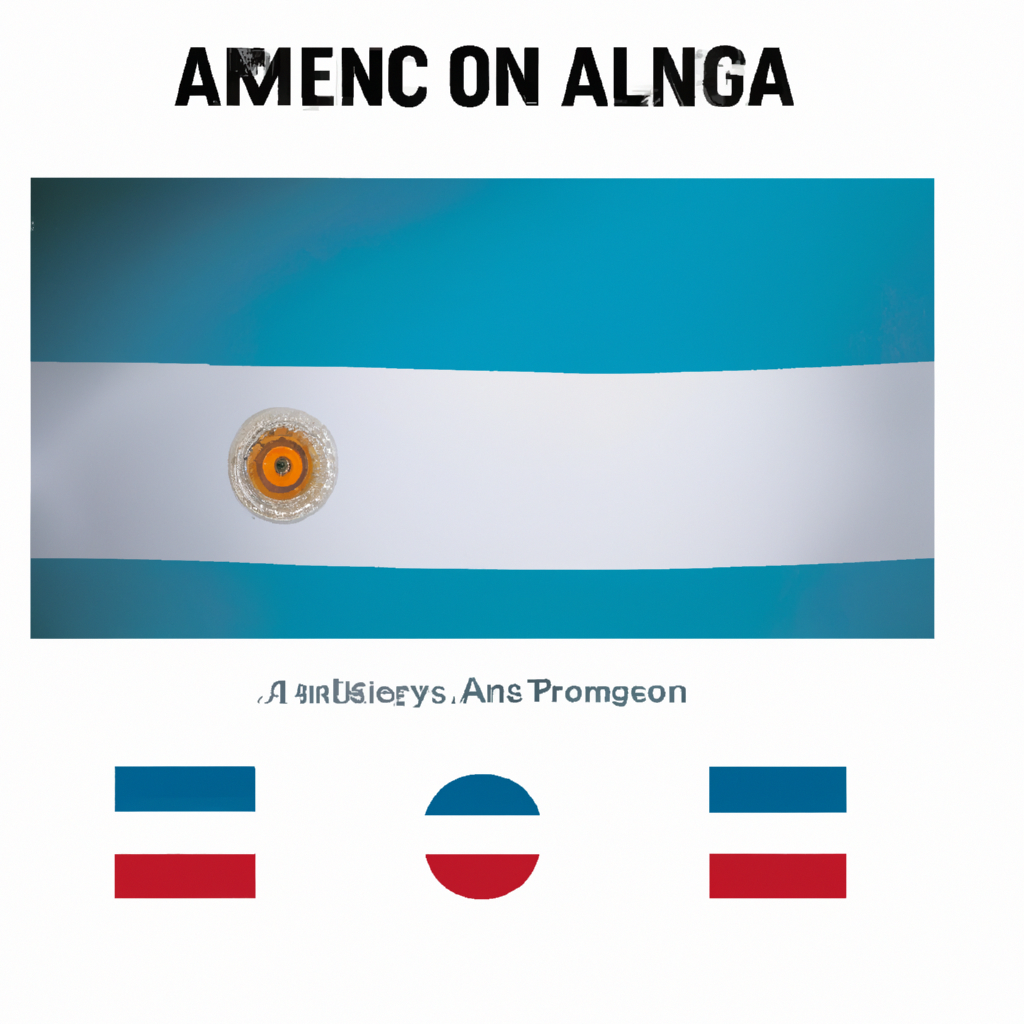

URL OpenAI: https://oaidalleapiprodscus.blob.core.windows.net/private/org-VQyNQRWDgspjldCWllprBfXW/user-S4qyX2ildshTnVDpy87KApyu/img-srd6hzlkughfVszbr2N4Pfao.png?st=2024-12-03T21%3A31%3A26Z&se=2024-12-03T23%3A31%3A26Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-12-03T01%3A20%3A20Z&ske=2024-12-04T01%3A20%3A20Z&sks=b&skv=2024-08-04&sig=0qfK2ONGhHbxryDTJ8qf8/VAT789Qdho68%2Bu2Xj4Hk4%3D


In [6]:
# Generate the image with OpenAI
aditional_instructions_to_generate_img = "trae la imagen de la bandera junto con la superficie"

image_url = generate_image_with_openai(response_of_function_gemini, aditional_instructions_to_generate_img)

# Download the image
response = requests.get(image_url)

# Verify if possible to download
if response.status_code == 200:
    # Get filename without extension
    filename = os.path.basename(image_url).split('.')[0]
    # Add the extension ".png"
    filename += ".png"
    
    # Directory to save the image
    directory = "./generated_images/"
    
    # Make directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Complete path
    filepath = os.path.join(directory, filename)
    
    # Save the image
    with open(filepath, 'wb') as f:
        f.write(response.content)
    
    print("La imagen ha sido descargada y almacenada correctamente en:", filepath)
    
    # Display the image using PIL
    img = Image.open(filepath)
    print(f"Prompt utilizado: {response_of_function_gemini}")
    display(img)

else:
    print("Hubo un error al descargar la imagen.")

# Output the image URL
print(f"URL OpenAI: {image_url}")